<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='images\header.png' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
	</div>
</div>


 <hr style="height:5px"> 

    
<h2>Aula 6 - Introdução à Ciência de Dados - <a href="https://www.kaggle.com/datasets/arshid/iris-flower-dataset">Iris Dataset </a> </h2>

Notebook desenvolvido por: <a href="http://lattes.cnpq.br/1346824250595330">Prof. Dr. Adriano C. Santana</a>

 <hr style="height:2px"> 

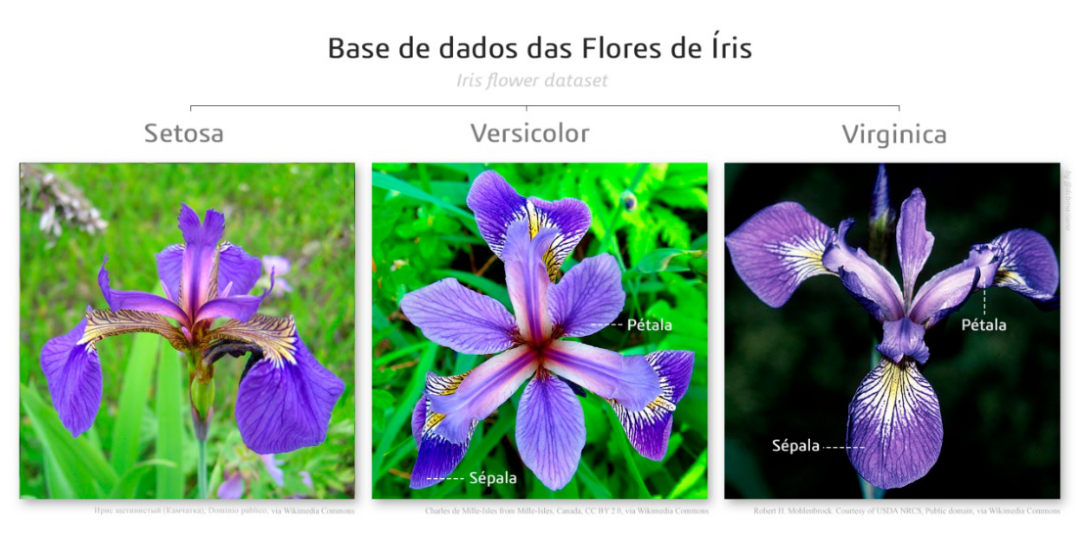

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carrega a imagem
img = mpimg.imread('images/irisdataset.jpg')

# Cria uma figura centralizada
plt.figure(figsize=(11, 8))
plt.imshow(img)
plt.axis('off')  # Oculta os eixos
plt.tight_layout()
plt.show()

In [15]:
# Confirmar a versão da Linguagem Python instalada
from platform import python_version
print(f'A versão da linguagem Python usada neste projeto é a {python_version()}!')

A versão da linguagem Python usada neste projeto é a 3.12.7!


In [17]:
# Verificar se o Python está funcionando
print('Bye bye, World!')

Bye bye, World!


---
## 1. Bibliotecas Necessárias para o Notebook (Aula)

Para este notebook, deve ser utilizada a mesma versão apresentada pelo professor da disciplina.

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados.
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados.
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas.

Será utilizado o conjunto de dados que se encontra no diretório `datasets`, em formato de arquivo `.csv e/ou .txt`.

---
## 2. Carregar e Exibir os Dados da Fonte

Primeiro, vamos importar todas as bibliotecas que serão utilizadas no projeto.

In [22]:
# -*- coding: utf-8 -*-

# importar a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np

# importar a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd 

# importar as bibliotecas usadas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


### Apresentação da base de dados

A base de dados Iris - que é uma flor - será usada para apresentação dos conceitos a serem estudados.
<br>
<br>
<center>
<div style="display:inline-block;">
    <div>
    <div style="padding: 5px; float: left;">
        <img src="images/iris_setosa.jpeg" style="height:180px;"/>
        <center>Setosa</center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="images/iris_virginica.jpeg"  style="height:180px;"/> 
        <center>Virginica</center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="images/iris_versicolour.jpeg"  style="height:180px;"/>
        <center>Versicolour</center>
    </div>
    </div>
</div> 
</center>

Primeiro: vamos importar os dados para o dataframe.

In [38]:
# importar o arquivo e guardar em um dataframe do Pandas
df_dataset = pd.read_csv ( 'datasets/iris.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


Segundo: vamos dar uma olhada rápida na base de dados.

In [30]:
# exibir uma amostra do dataframe
#display(df_dataset.head())
display(df_dataset)

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa
...,...,...,...,...,...,...,...
147,145,6.7,3.0,5.2,2.3,São Paulo,Iris-virginica
148,146,6.3,2.5,5.0,1.9,Campinas,Iris-virginica
149,147,6.5,3.0,5.2,2.0,Sorocaba,Iris-virginica
150,148,6.2,3.4,5.4,2.3,Sorocaba,Iris-virginica


---
## 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como torná-los mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.

## 3.1 Eliminação de atributos irrelevantes

O objetivo do projeto é identificar a espécie de uma flor, que é a (`classe`). Não é preciso uma análise profunda para observar que os atributos `id_planta` e `cidade_origem` não contribuem para a identificação. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes. 

*Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.*

In [40]:
# remover as colunas id_planta e cidade_origem
df_dataset = df_dataset.drop(columns=['id_planta','cidade_origem'])

# imprimir o dataframe
display(df_dataset.head(n=10))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


---
## 3.2 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN) na base de dados.

In [43]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valores ausentes
display(df_dataset.iloc[idxRowNan])

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,NaN,1.7,0.5,Iris-setosa
24,4.8,NaN,1.9,0.2,Iris-setosa
30,4.8,3.1,NaN,0.2,Iris-setosa


Preencher os valores - NaN - com a média dos valores conhecidos de `largura_sepala` e `comprimento_petala`, na respectiva classe. Neste caso, a classe é a mesma: `Iris-setosa`.

In [46]:
def trataFaltantes( df_dataset ):
    
    # seleciona apenas as linhas da base de dados, onde a coluna largura_sepala não contém valores nulos
    notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['largura_sepala']), :]
    # seleciona apenas as linhas da base de dados, onde a coluna comprimento_petala não contém valores nulos
    notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['comprimento_petala']), :]

    # calcula a média dos valores do atributo largura_sepala que não são nulos e que são da classe Iris-setosa 
    media_ls = notNull_ls[ notNull_ls['classe']=='Iris-setosa' ]['largura_sepala'].mean()
    # calcula a média dos valores do atributo comprimento_sepala que não são nulos e que são da classe Iris-setosa    
    media_cp = notNull_cp[ notNull_cp['classe']=='Iris-setosa' ]['comprimento_petala'].mean()

    # substitui os valores nulos pela média
    df_dataset.loc[ pd.isnull(df_dataset['largura_sepala']), 'largura_sepala'] = media_ls
    # substitui os valores nulos pela média
    df_dataset.loc[ pd.isnull(df_dataset['comprimento_petala']), 'comprimento_petala'] = media_cp
    
    return df_dataset

trataFaltantes( df_dataset )
    
# imprime apenas as linhas que antes possuíam valores NaN
print('\nObjeto(s) com valor(es) nulo(s):')
display(df_dataset.iloc[idxRowNan])


Objeto(s) com valor(es) nulo(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.416667,1.700000,0.5,Iris-setosa
24,4.8,3.416667,1.900000,0.2,Iris-setosa
30,4.8,3.100000,1.461224,0.2,Iris-setosa


---
## 3.3 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [48]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')


Objeto(s) redundante(s) e/ou inconsistente(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor
102,5.8,2.7,5.1,1.9,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,7.7,2.8,6.7,2.0,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica


Existem objetos redundantes (duplicados) e outros inconsistentes (iguais, exceto diagnóstico distintos). 

Primeiro, serão removidos os registros redundantes, mantendo na base apenas o primeiro deles.

In [51]:
def delDuplicatas( df_dataset ):
    
    # remove o(s) objeto(s) duplicado(s), mantendo apenas a primeira ocorrência
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df_dataset = delDuplicatas( df_dataset )

Após remover os objetos redundantes, é preciso checar se há registros inconsistentes.

In [55]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se existir objetos inconsistentes, exibir
if len(df_duplicates)>0:
    print('\nObjeto(s) inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')
    


Objeto(s) inconsistente(s):


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor


Existem registros inconsistentes. Nesse caso, como não é possível saber qual deles está correto. Assim, eles devem ser eliminados.

In [57]:
def delInconsistencias( df_dataset ):

    df_dataset = df_dataset.drop_duplicates(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'], keep = False)    
  
    return df_dataset

df_dataset = delInconsistencias( df_dataset )

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se existir registros redundantes ou inconsistentes, exibir
if len(df_duplicates) > 0:
    display(df_duplicates)
else:
    print('Não existem registros redundantes e/ou inconsistentes! :)')

Não existem registros redundantes e/ou inconsistentes! :)


In [65]:
display(df_dataset.tail())

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
147,6.7,3.0,5.2,2.3,Iris-virginica
148,6.3,2.5,5.0,1.9,Iris-virginica
149,6.5,3.0,5.2,2.0,Iris-virginica
150,6.2,3.4,5.4,2.3,Iris-virginica
151,5.9,3.0,5.1,1.8,Iris-virginica


---
## 4. Análise dos Dados
A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados.

In [67]:
# apresenta as principais estatísticas da base de dados para atributos numéricos
df_detalhes = df_dataset.describe()

display(df_detalhes)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,146.000000,146.000000,146.000000,146.000000
mean,5.958219,3.190639,3.795625,1.215753
std,1.493284,1.715087,1.755223,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,20.900000,23.100000,6.900000,2.500000


---
## 4.1 Detecção de outliers (valor atípico)
Outro passo importante na análise e tratamento dos dados é a detecção de outliers (dados gerados por leituras incorretas, erros de digitação etc).

`Gráfico Box Plot`

Uma das maneiras mais simples de verificar se os dados contém outliers.

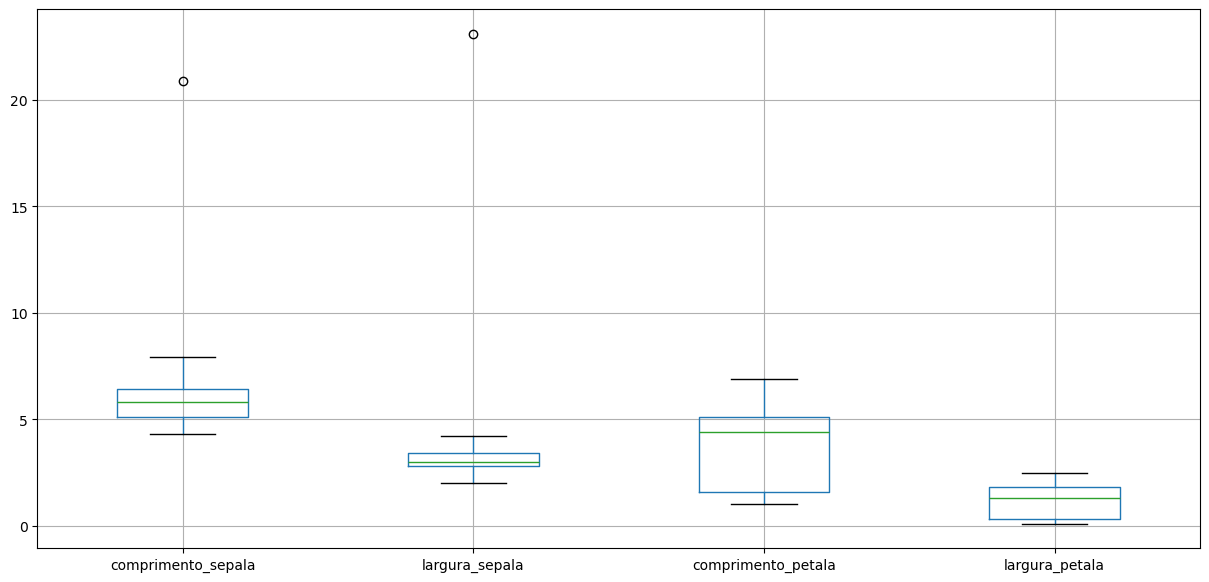

In [71]:
# gerar um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando que os atributos `comprimento_petala` e `largura_petala` possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de objetos com valores de atributos incorretos.

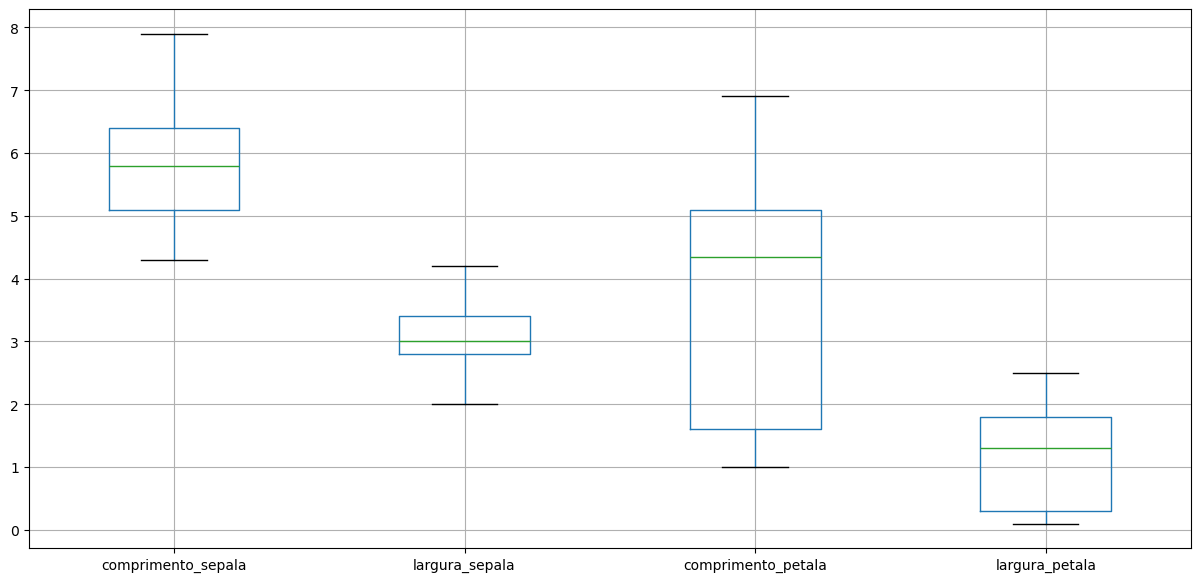

In [74]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados 
    """
    
    for atributo in df_dataset.columns[:-1]:

        # obtem o terceiro e o primeiro quartil. 
        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])
        
        # calcula o IQR
        IQR = q75 - q25

        # remove os outliers com base no valor do IQR
        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]
    
    return df_dataset

# remove os outliers
df_dataset = removeOutliers( df_dataset )

# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))
plt.show()


Depois da remoção, o box plot e os gráficos de dispersão indicam que não há mais nenhum *outlier* na base de dados. 